# Extract the features of the IEA

In this notebook we will use the data from interictal epilepform activity and using wavelet transform we will extract the phase of the multidien cycles. We will also compute the PLV for the locking of the seizures and the multidien phase.

## Import libraries


In [12]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
import pywt
import datetime as dt
from pandas.plotting import register_matplotlib_converters

## Load the data 

In [13]:
data = pd.read_csv(r'data/features_day_JE_acausal4.csv')
data

Time  Seizures     IEA_1     IEA_2  CircadianAbs1  \
0    733972.979167         0 -0.688957 -0.824398       1.062300   
1    733973.979167         0 -0.397765 -0.481134       0.925151   
2    733974.979167         2 -0.045270  0.720290       0.647196   
3    733975.979167         0  0.537114  0.319816       0.551267   
4    733976.979167         0 -0.482058 -0.538345       0.767475   
..             ...       ...       ...       ...            ...   
535  734507.979167         1 -0.127745 -0.545234       1.115427   
536  734508.979167         0 -0.576691 -0.545234       0.983173   
537  734509.979167         0 -0.639701 -0.670254       0.988099   
538  734510.979167         0 -0.663330 -0.745266       0.839624   
539  734511.979167         0 -0.222260 -0.395211       0.503807   

     CircadianAngle1  CircadianCos1  CircadianSin1  CircadianFiltSig1  \
0           0.302651       0.954550       0.298052           0.119773   
1           0.052233       0.998636       0.052209          -0.035270   
2          -0.230024       0.973661      -0.228001          -0.022063   
3           0.209761       0.978081       0.208226          -0.025371   
4           0.170185       0.985554       0.169364           0.040485   
..               ...            ...            ...                ...   
535         0.005430       0.999985       0.005430          -0.016796   
536        -0.108773       0.994090      -0.108559          -0.027329   
537        -0.058658       0.998280      -0.058625          -0.019427   
538        -0.020084       0.999798      -0.020082           0.008930   
539        -0.317026       0.950167      -0.311742           0.034325   

     CircadianAbs2  ...  MultidienCos7  MultidienSin7  MultidienFiltSig7  \
0         0.749475  ...       0.744446       0.667682           0.029787   
1         0.830741  ...       0.964069      -0.265653           0.116543   
2         0.192435  ...       0.976613      -0.215003           0.193238   
3         0.098967  ...       0.997251      -0.074096           0.254267   
4         0.422072  ...       0.996082       0.088433           0.295675   
..             ...  ...            ...            ...                ...   
535       1.101473  ...       0.993468       0.114108           0.548256   
536       1.204308  ...       0.939286       0.343135           0.474438   
537       1.241518  ...       0.824040       0.566531           0.363669   
538       1.013170  ...       0.631959       0.775002           0.223788   
539       0.730715  ...       0.301400       0.953498           0.065373   

     MultidienAbs8  MultidienAngle8  MultidienCos8  MultidienSin8  \
0         0.036946        -0.296799       0.956277      -0.292461   
1         0.107939        -0.642337       0.800698      -0.599068   
2         0.167263        -0.532674       0.861452      -0.507839   
3         0.213122        -0.401625       0.920427      -0.390915   
4         0.249645        -0.267405       0.964460      -0.264229   
..             ...              ...            ...            ...   
535       0.366721         0.365830       0.933827       0.357725   
536       0.328287         0.542718       0.856308       0.516465   
537       0.280280         0.734992       0.741836       0.670581   
538       0.219004         0.958782       0.574517       0.818492   
539       0.133596         1.280733       0.286013       0.958226   

     MultidienFiltSig8  meanWeeklySeizures  stdWeeklySeizures  
0             0.013614            0.009809           0.098481  
1             0.074721            0.008465           0.091629  
2             0.132383            0.011279           0.104522  
3             0.184456            0.012681           0.115850  
4             0.229066            0.010870           0.107936  
..                 ...                 ...                ...  
535           0.330746            0.012681           0.115850  
536           0.269407            0.010870           0.107936  
537           

### Plot the IEA with the Seizures

Our raw data is the interictal epilepform activity (IEA). For the subject "JE" we obseve that IEA changes in time in a very periodic matter.

<IPython.core.display.Javascript object>


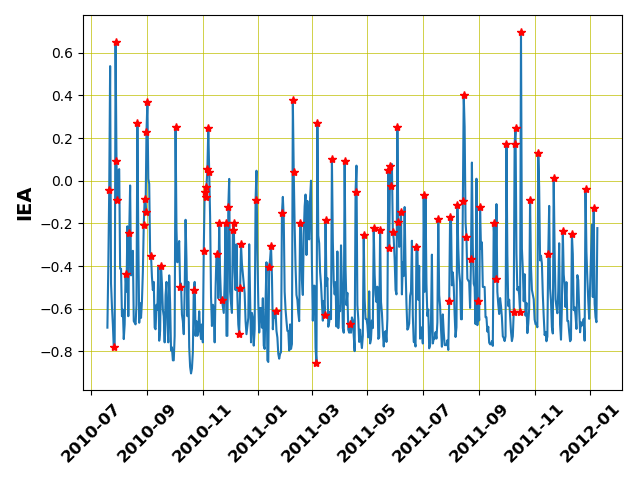

In [4]:
PosSeizJE=np.where(data.Seizures>=1)
TimeDate=data.Time[:].astype(int).map(dt.datetime.fromordinal)
register_matplotlib_converters()

plt.figure()
plt.plot(TimeDate,data.IEA_1)
plt.ylabel('IEA', weight='bold', fontsize=14)
plt.plot(TimeDate.iloc[PosSeizJE],data.IEA_1.iloc[PosSeizJE],'r*')
#plt.xlim((4900, 5100))
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.grid(color = 'y', linewidth='0.5')
plt.tight_layout()
plt.show()

## Wavelet transform

As we observe, the IEA has some periodicity that changes in time. To campture the instanteneous changes in time, we use a morlet wavelet tranform in the multidien range (around 4-45 days).  Note that the period changes in time during the recordings.

<IPython.core.display.Javascript object>


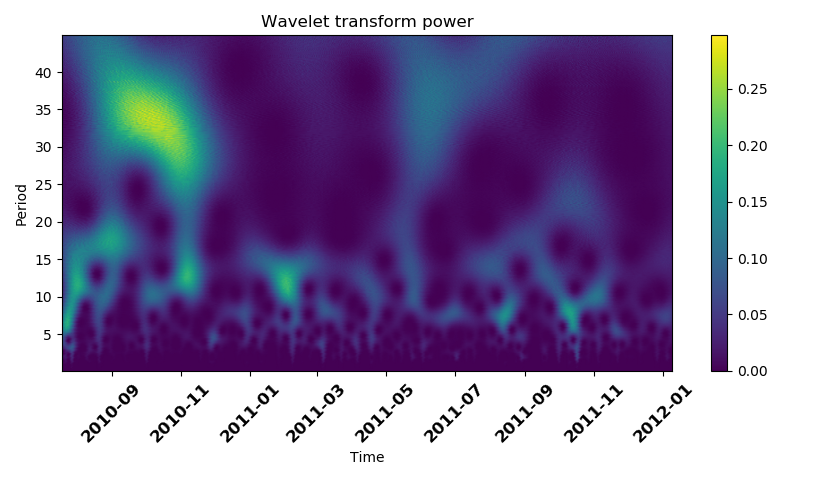

In [5]:
fs=1
scales=np.arange(0.1,45,0.1)
frequencies = pywt.scale2frequency('cmor1.5-1.0', scales) / 1

[coefficients_IEA, frequencies] = pywt.cwt(data.IEA_1, scales,'cmor1.5-1.0',1)
power_IEA = (abs(coefficients_IEA)) ** 2
Periods=1/frequencies

plt.figure(figsize=(8.4, 4.8))
c=plt.pcolormesh(TimeDate,Periods,power_IEA,cmap='viridis', shading='gouraud',vmin = power_IEA.min(), vmax = power_IEA.max())
plt.title('Wavelet transform power')
plt.colorbar(c)
plt.ylabel('Period')
plt.xlabel('Time')
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.tight_layout()
plt.show()

## Peak of the periodogram extraction

We take the peak of the periodogram and extract the phase of that band.

<IPython.core.display.Javascript object>


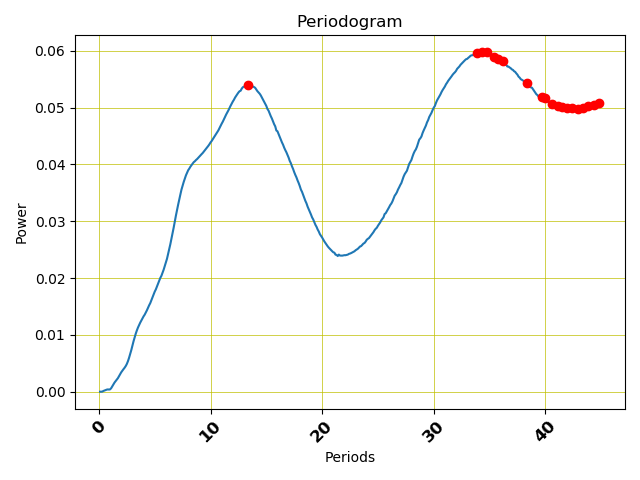

Peak of the periodogram = 35


<IPython.core.display.Javascript object>


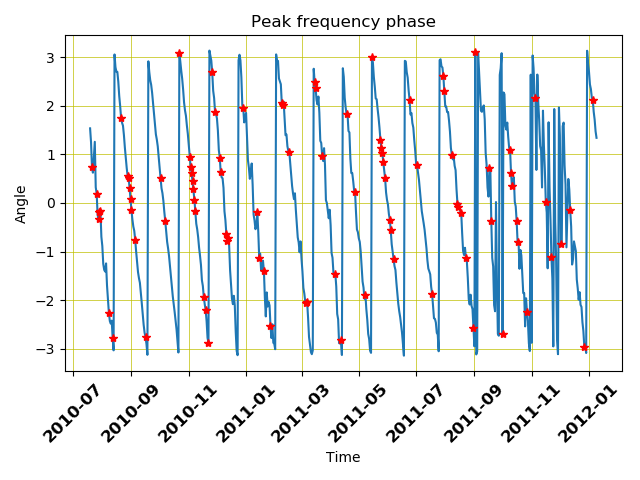

In [6]:
# peak frequency phas extraction
peaks, properties = signal.find_peaks(np.mean(power_IEA,axis=1),np.mean(np.mean(power_IEA,axis=1)))
hights = properties['peak_heights']
# Periodogram
Periodo=np.mean(power_IEA,axis=1)

plt.figure()
plt.title('Periodogram')
plt.plot(Periods,Periodo)
plt.plot(Periods[peaks],Periodo[peaks],'ro')
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.grid(color = 'y', linewidth='0.5')
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.xlabel('Periods')
plt.ylabel('Power')
plt.tight_layout()
plt.show()
print('Peak of the periodogram = %0.0f' %(Periods[peaks[np.argmax(hights)]]))
# take the peak of the periodogram
angle_peak_IEA=np.angle(coefficients_IEA[peaks[np.argmax(hights)],:])

plt.figure()
plt.title('Peak frequency phase')
plt.plot(TimeDate,angle_peak_IEA)
plt.plot(TimeDate.iloc[PosSeizJE],angle_peak_IEA[PosSeizJE],'r*')
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.grid(color = 'y', linewidth='0.5')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.tight_layout()
plt.show()



## PLV value and polar histogram

We compute the phase locking value (PLV) of the seizures on the phase of the multidien cycle.

In [7]:
def PLVcalculation(phase):
    z=sum(np.exp(1j*phase))/len(phase)
    PLV=np.abs(z)
    Psi=np.angle(z)
    return PLV,Psi

phase_IEA=angle_peak_IEA[PosSeizJE]
PLV,Psi=PLVcalculation(phase_IEA)


We plot the polar histogram along with the PLV. Note the mean phase locking.

<IPython.core.display.Javascript object>


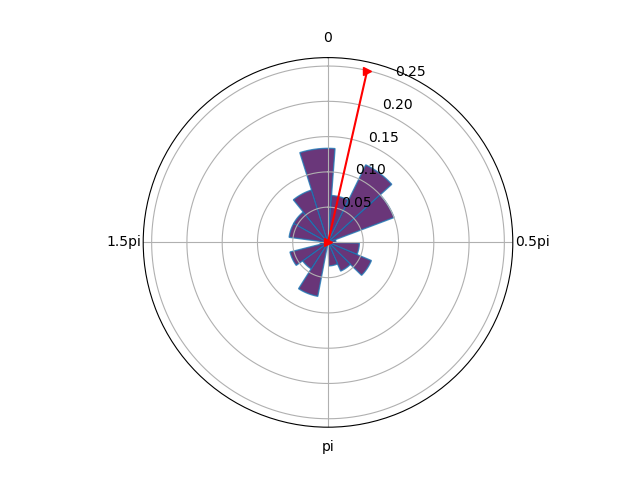

In [8]:
bins=16
num, bins = np.histogram(angle_peak_IEA[PosSeizJE], bins=bins)
widths = np.diff(bins)
radius = num/len(PosSeizJE[0])
# Plot the data
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                 edgecolor='C0', fill=True, linewidth=1,alpha=0.3)

lines, labels = plt.thetagrids(range(0, 360, 90), ('0', '0.5pi', 'pi', '1.5pi'))
for r, bar in zip(radius, patches):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.8)
ax.plot([0 ,Psi],[0,PLV],'r->')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1) 


plt.show()